#Import Libraries

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.axes_style('whitegrid')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#Read The Data

In [ ]:
from scipy.io import loadmat

def read_HSI():
    data = loadmat('PaviaU.mat')
    X = data['paviaU']

    data_gt = loadmat('PaviaU_gt.mat')
    y = data_gt['paviaU_gt']

    print(f"X shape: {X.shape}\ny shape: {y.shape}")
    return X, y

X, y = read_HSI()

X shape: (610, 340, 103)
y shape: (610, 340)


#Visualize Bands

(610, 340, 103)


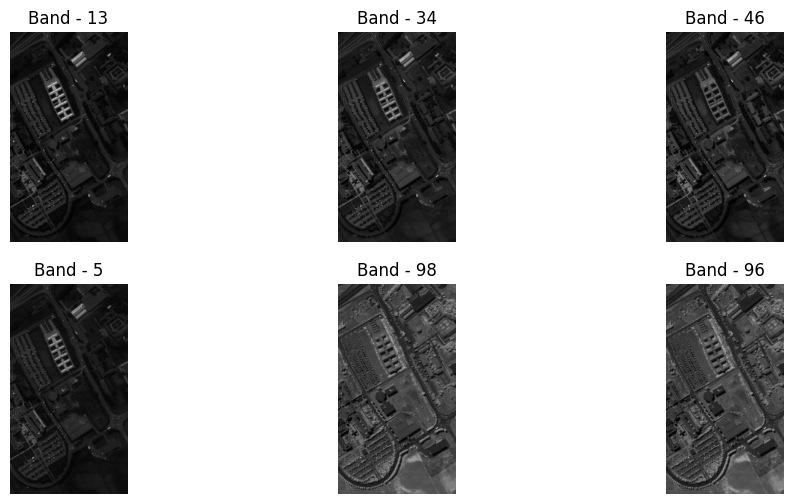

In [ ]:
fig = plt.figure(figsize=(12, 6))
print(X.shape)
for i in range(1, 1 + 6):
    fig.add_subplot(2, 3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:, :, q], cmap='gray')
    plt.axis('off')
    plt.title(f'Band - {q}')

plt.savefig('IP_Bands.png')


#Visualize The Ground Truth

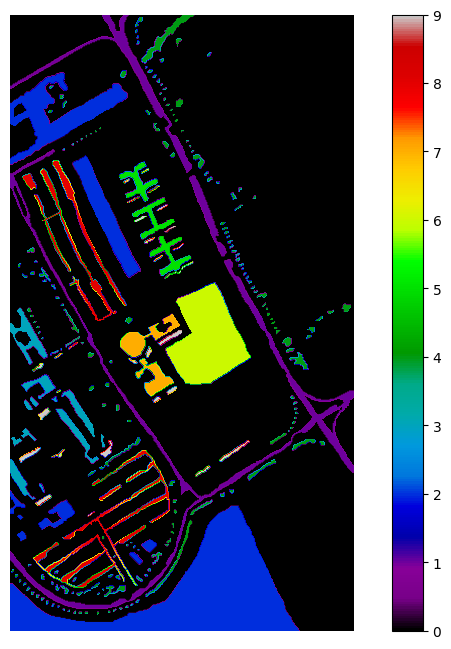

In [ ]:
plt.figure(figsize = (10, 8))
plt.imshow(y, cmap = 'nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_GT.png')
plt.show()

#Convert the Dataset into csv

In [ ]:
import pandas as pd
import numpy as np

def extract_pixels(X,y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis = 1)
  df.columns = [f'bans{i}' for i in range(1, 1+X.shape[2])] + ['class']
  df.to_csv('Dataset.csv')
  return df

df = extract_pixels(X,y)

In [ ]:
df.head()

,bans1,bans2,bans3,bans4,bans5,bans6,bans7,bans8,bans9,bans10,...,bans95,bans96,bans97,bans98,bans99,bans100,bans101,bans102,bans103,class
0,647,499,464,371,291,319,365,322,296,305,...,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,604,546,527,455,378,377,336,314,324,329,...,2583,2538,2509,2511,2501,2468,2442,2464,2528,0
2,621,746,556,360,285,300,274,276,332,319,...,2288,2242,2193,2202,2225,2266,2308,2345,2361,0
3,637,592,482,556,508,284,178,198,193,224,...,2675,2609,2541,2551,2571,2569,2573,2620,2644,0
4,625,560,480,360,377,341,264,208,231,266,...,2392,2344,2289,2328,2415,2424,2386,2431,2456,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207400 entries, 0 to 207399
Columns: 104 entries, bans1 to class
dtypes: uint16(103), uint8(1)
memory usage: 40.9 MB


In [ ]:
df.iloc[:, :-1].describe()

,bans1,bans2,bans3,bans4,bans5,bans6,bans7,bans8,bans9,bans10,...,bans94,bans95,bans96,bans97,bans98,bans99,bans100,bans101,bans102,bans103
count,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,...,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000
mean,925.324995,850.237584,800.363558,809.889783,830.085950,834.162700,833.530641,825.932729,823.827637,830.388689,...,2262.503269,2266.693293,2257.763443,2249.329595,2246.216779,2238.254364,2231.822647,2224.744884,2236.901707,2253.451692
std,444.427499,468.464292,493.590158,527.235307,555.419089,574.543548,592.474167,605.782075,619.492506,636.532214,...,863.285910,863.351557,857.286520,845.571285,833.001117,826.922155,827.403828,827.257369,834.092348,844.165146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,145.000000,146.000000,150.000000,140.000000,0.000000,134.000000,0.000000
25%,649.000000,555.000000,483.000000,473.000000,480.000000,474.000000,461.000000,444.000000,433.000000,430.000000,...,1696.000000,1699.000000,1693.000000,1690.000000,1696.000000,1692.000000,1685.000000,1675.000000,1682.000000,1692.000000
50%,857.000000,762.000000,694.000000,690.000000,693.000000,681.000000,671.000000,661.000000,657.000000,658.000000,...,2246.000000,2252.000000,2244.000000,2236.000000,2238.000000,2235.000000,2231.000000,2226.000000,2244.000000,2261.000000
75%,1111.000000,1046.000000,1015.000000,1036.000000,1058.000000,1066.000000,1068.000000,1064.000000,1066.000000,1080.000000,...,2724.000000,2730.000000,2721.000000,2711.000000,2701.000000,2688.000000,2683.000000,2677.000000,2692.000000,2715.000000
max,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000


#Principal Component Analysis (PCA)

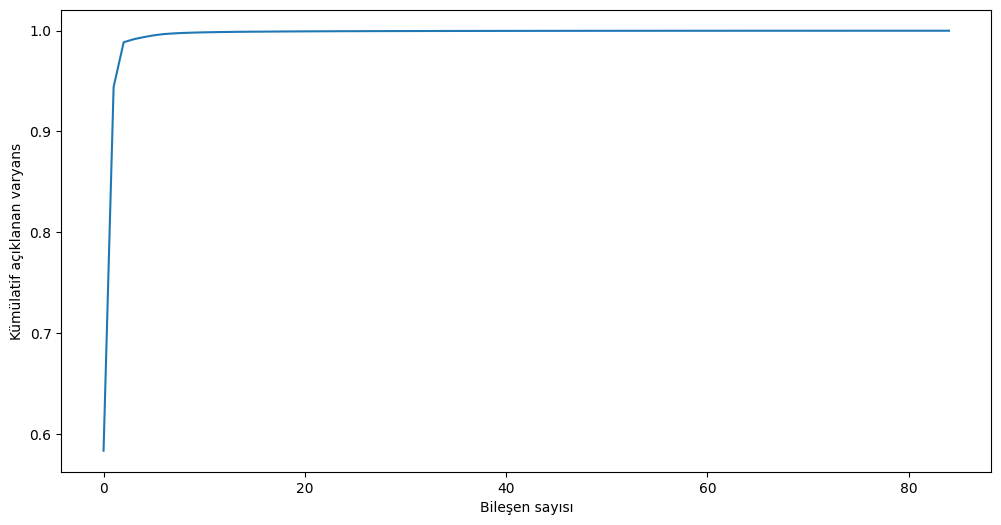

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 85)

principalComponents = pca.fit_transform(df.iloc[:, :-1].values)

ev = pca.explained_variance_ratio_

plt.figure(figsize = (12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Bileşen sayısı')
plt.ylabel('Kümülatif açıklanan varyans')

plt.show()

In [ ]:
pca = PCA(n_components = 40)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,41)] + ['class']

In [ ]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,class
0,-5150.190044,6795.052770,1532.351461,410.030134,-259.856157,-832.898970,293.239776,278.385213,-285.609915,251.208845,...,-26.613677,-14.682451,32.043656,50.078953,-29.579371,0.522656,7.507207,-16.558591,-12.921040,0
1,-6082.245760,3158.592195,1463.194744,154.617093,-438.871878,-496.202149,362.925839,187.355434,-287.796732,180.614526,...,28.936565,-1.417996,-37.792452,14.740634,6.902347,1.113272,-42.339650,7.940622,-5.740210,0
2,-7214.505405,1158.875812,1400.817899,410.044063,38.052916,-560.804196,-140.004203,8.847608,-211.057195,14.139043,...,16.530720,4.860463,21.316754,-4.439551,15.738107,-18.704544,28.112500,-2.990820,-19.580801,0
3,-6566.279360,3398.894763,1126.024772,496.775042,-302.415250,-409.493899,218.391586,-2.957277,-223.380076,188.819721,...,2.847933,16.979329,17.009704,-25.176051,-1.049875,-3.826501,-36.264825,5.722270,26.858471,0
4,-6496.967970,2154.797771,1035.954575,27.247705,-194.891403,-189.044607,-71.142484,-97.987804,-126.456170,215.182030,...,-32.385019,-31.571579,-8.138979,4.834871,-0.541535,6.283512,30.208047,9.114674,-6.472755,0


# Display the bands after PCA


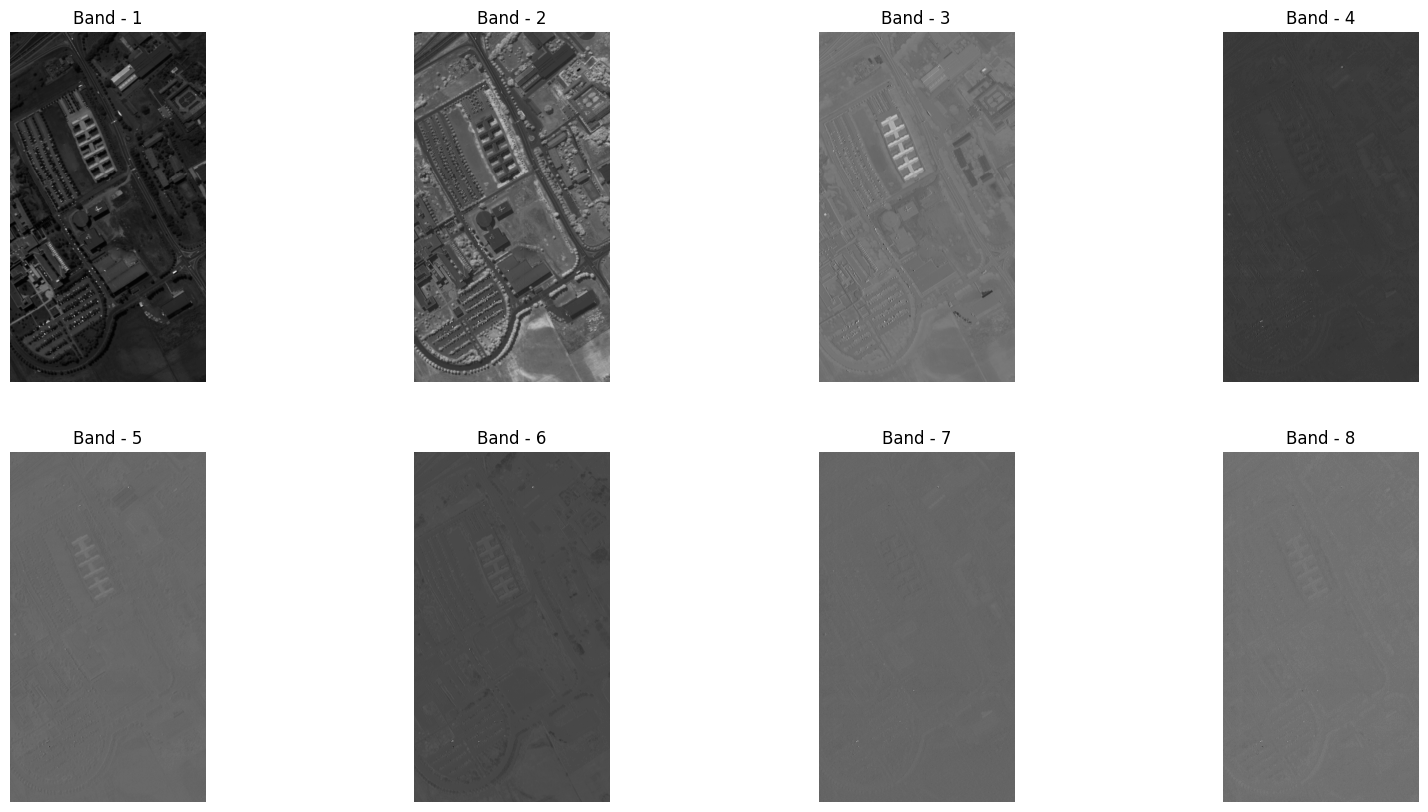

In [ ]:
fig = plt.figure(figsize = (20,10))

for i in range(1, 1+8):
  fig.add_subplot(2,4, i)
  plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(610,340), cmap = 'gray')
  plt.axis('off')
  plt.title(f'Band - {i}')

plt.savefig('IP_PCA_Bands.png')

In [ ]:
q.to_csv('IP_40_PCA.csv', index = False)

#Support Vector Machine (SVM)

In [ ]:
x = q[q['class'] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, 'class'].values

names = ['Asphalt', 'Meadows', 'Gravel', 'Trees', 'Painted metal sheets', 'Bare Soil', 'Bitumen',
         'Self-Blocking Bricks', 'Shadows']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.30, random_state = 11)

svm = SVC(C = 150, kernel = 'rbf', cache_size = 10*1024)

svm.fit(X_train, y_train)

ypred = svm.predict(X_test)

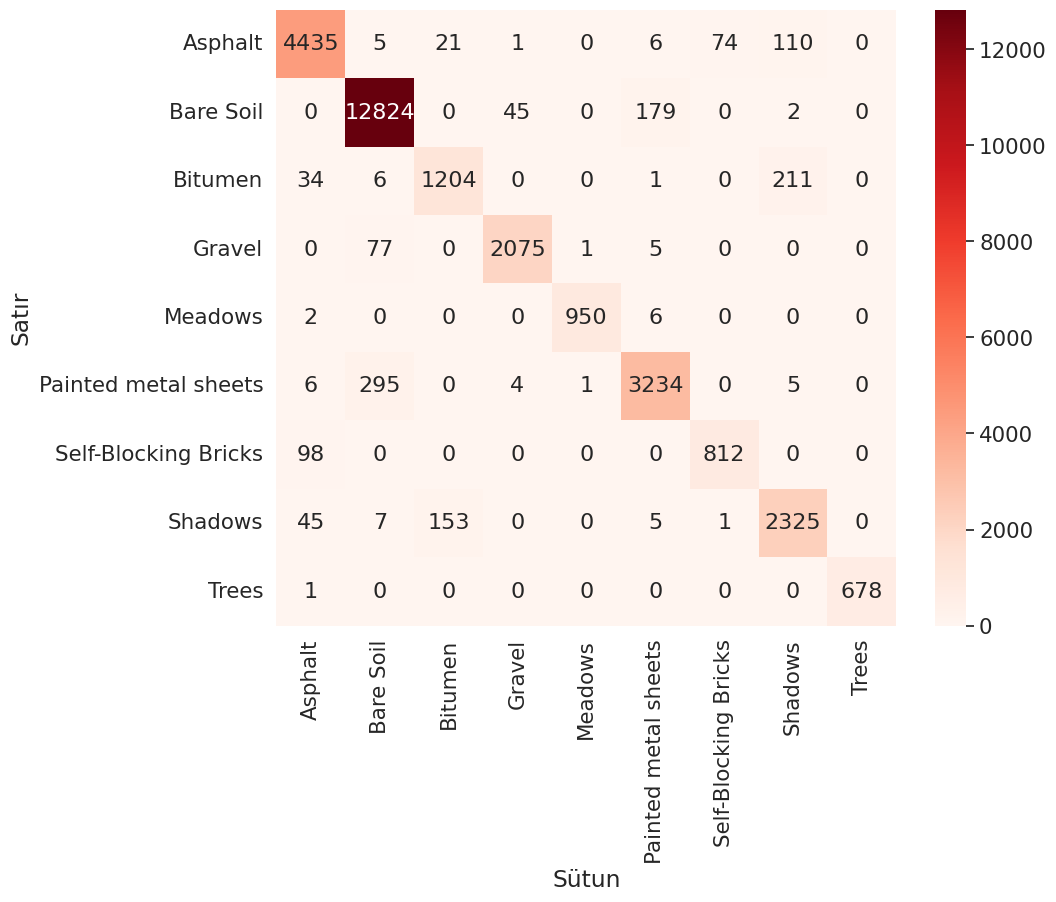

In [ ]:
import seaborn as sn
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns = np.unique(names), index = np.unique(names))
df_cm.index.name = 'Satır'
df_cm.columns.name = 'Sütun'
plt.figure(figsize = (10, 8))
sn.set(font_scale = 1.4) #for label size
sn.heatmap(df_cm, cmap = "Reds", annot = True, annot_kws = {"size" : 16}, fmt = 'd')
plt.savefig('cmap.png', dpi = 300)

In [ ]:
print(classification_report(y_test, ypred, target_names = names))

                      precision    recall  f1-score   support

             Asphalt       0.96      0.95      0.96      4652
             Meadows       0.97      0.98      0.98     13050
              Gravel       0.87      0.83      0.85      1456
               Trees       0.98      0.96      0.97      2158
Painted metal sheets       1.00      0.99      0.99       958
           Bare Soil       0.94      0.91      0.93      3545
             Bitumen       0.92      0.89      0.90       910
Self-Blocking Bricks       0.88      0.92      0.90      2536
             Shadows       1.00      1.00      1.00       679

            accuracy                           0.95     29944
           macro avg       0.95      0.94      0.94     29944
        weighted avg       0.95      0.95      0.95     29944



In [ ]:
l = []
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1)))

Best Sigma Value: 0.1
Best Accuracy: 43.63310776193841


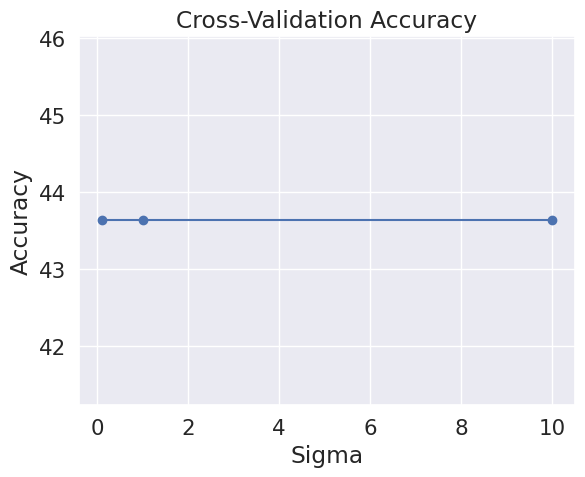

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Sigma değerlerini belirleyin
sigma_values = [0.1, 1, 10]  # Örnek olarak sigma değerleri

# Boş bir liste oluşturun
mean_accuracies = []

# Her bir sigma değeri için çapraz doğrulama yapın ve doğruluk skorlarını kaydedin
for sigma in sigma_values:
    classifier = SVC(gamma=1/(2*sigma**2))  # Sigma değerini kullanarak SVC sınıflandırıcısını oluşturun
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
    mean_accuracies.append(accuracies.mean() * 100)

# En iyi sigma değerini bulun
best_sigma = sigma_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)

print("Best Sigma Value:", best_sigma)
print("Best Accuracy:", best_accuracy)

# Çizgi grafiği oluşturun
plt.plot(sigma_values, mean_accuracies, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy')
plt.grid(True)
plt.show()


Accuracy: 85.88 %
Standard Deviation: 0.85 %


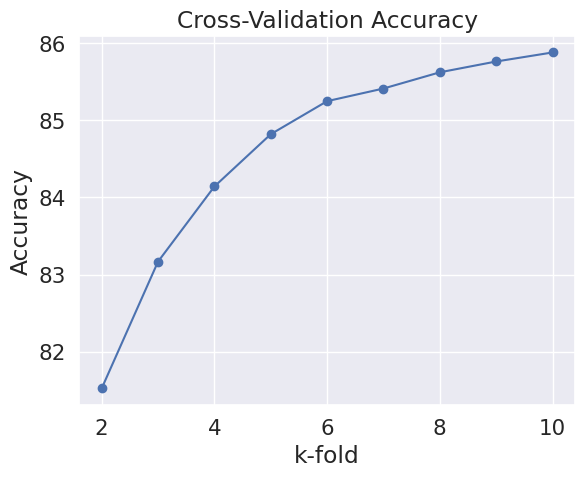

In [ ]:
# SVC sınıflandırıcısını oluştururken gamma parametresini kullanarak sigma değerini ayarlayın
classifier = SVC()  # Sigma değerini burada belirleyebilirsiniz

# Çapraz doğrulama ile doğruluk skorunu hesaplayın
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

# Doğruluk skoru ve standart sapmayı yazdırın
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

import matplotlib.pyplot as plt

# K-fold değerlerini belirleyin
k_values = range(2, 11)  # Örnek olarak 2'den 10'a kadar k-fold değerleri

# Boş bir liste oluşturun
mean_accuracies = []

# Her bir k-fold değeri için çapraz doğrulama yapın ve doğruluk skorlarını kaydedin
for k in k_values:
    classifier = SVC(gamma='scale')  # Sigma değerini burada belirleyebilirsiniz
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=k)
    mean_accuracies.append(accuracies.mean() * 100)

# Çizgi grafiği oluşturun
plt.plot(k_values, mean_accuracies, marker='o')
plt.xlabel('k-fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy')
plt.grid(True)
plt.show()



<ipython-input-20-3500c71d6f4e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clmap = np.array(l).reshape(610,340).astype('float')


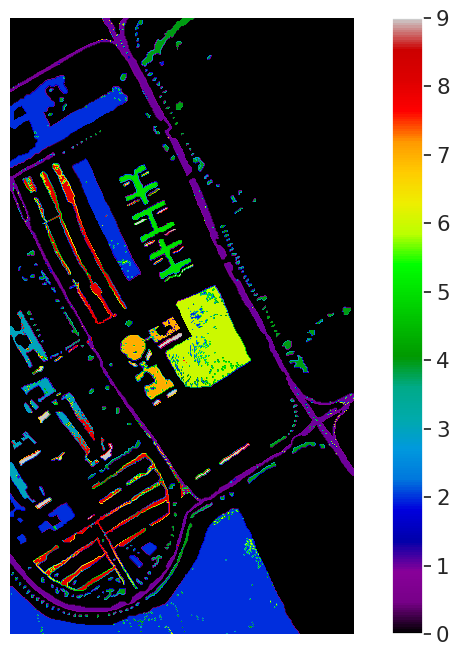

In [ ]:
clmap = np.array(l).reshape(610,340).astype('float')
plt.figure(figsize = (10, 8))
plt.imshow(clmap, cmap = 'nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()